In [40]:
from apyori import apriori
import csv
# Dữ liệu mẫu
transactions = [
    {'A', 'B', 'C', 'D', 'E', 'F'},
    {'B', 'C', 'D', 'E', 'F', 'G'},
    {'A', 'D', 'E', 'H'},
    {'A', 'D', 'F', 'I', 'J'},
    {'B', 'D', 'E', 'K'}
]


# Áp dụng thuật toán Apriori
results = list(apriori(transactions, min_support=0.6, min_confidence=0.01))

# In ra tất cả các luật
for rule in results:
    print(("Items: " + str(rule.items)).replace("'",""))
    print("Support: " + str(rule.support))
    print("Confidence: " + str(rule.ordered_statistics[0].confidence))
    print("Lift: " + str(rule.ordered_statistics[0].lift))
    print()
with open('taphop.csv', 'w', newline='') as csvfile:
    fieldnames = ['Items', 'Support', 'Confidence']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for rule in results:
        items_sorted = sorted(rule.items)  # Sort items
        items_formatted = "{" + ", ".join(items_sorted) + "}"
        writer.writerow({'Items': items_formatted, 'Support': rule.support, 'Confidence': rule.ordered_statistics[0].confidence})

Items: frozenset({A})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({B})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({D})
Support: 1.0
Confidence: 1.0
Lift: 1.0

Items: frozenset({E})
Support: 0.8
Confidence: 0.8
Lift: 1.0

Items: frozenset({F})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({A, D})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({D, B})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({B, E})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({D, E})
Support: 0.8
Confidence: 0.8
Lift: 1.0

Items: frozenset({D, F})
Support: 0.6
Confidence: 0.6
Lift: 1.0

Items: frozenset({D, B, E})
Support: 0.6
Confidence: 0.6
Lift: 1.0



In [41]:

with open('association_rules.csv', 'w', newline='') as csvfile:
    fieldnames = ['Rule', 'Support', 'Confidence']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
# In ra thông tin thống kê của mỗi luật
    for rule in results:
        print("-----------------")
        print("Items:"+",".join(rule.items))
        print("Support: " + str(rule.support))
        print("Ordered Statistics:")
        
        
        for statistic in rule.ordered_statistics:
            item_base = ', '.join(statistic.items_base) if statistic.items_base else None
            item_add = ', '.join(statistic.items_add)
            if item_base is not None:
                rule_text = f"{item_base} -> {item_add}"
                print(f"  {item_base} -> {item_add}")
                support = str(rule.support)
                print("  Confidence:", statistic.confidence)
                writer.writerow({'Rule': rule_text, 'Support': support, 'Confidence': statistic.confidence})

-----------------
Items:A
Support: 0.6
Ordered Statistics:
-----------------
Items:B
Support: 0.6
Ordered Statistics:
-----------------
Items:D
Support: 1.0
Ordered Statistics:
-----------------
Items:E
Support: 0.8
Ordered Statistics:
-----------------
Items:F
Support: 0.6
Ordered Statistics:
-----------------
Items:A,D
Support: 0.6
Ordered Statistics:
  A -> D
  Confidence: 1.0
  D -> A
  Confidence: 0.6
-----------------
Items:D,B
Support: 0.6
Ordered Statistics:
  B -> D
  Confidence: 1.0
  D -> B
  Confidence: 0.6
-----------------
Items:B,E
Support: 0.6
Ordered Statistics:
  B -> E
  Confidence: 1.0
  E -> B
  Confidence: 0.7499999999999999
-----------------
Items:D,E
Support: 0.8
Ordered Statistics:
  D -> E
  Confidence: 0.8
  E -> D
  Confidence: 1.0
-----------------
Items:D,F
Support: 0.6
Ordered Statistics:
  D -> F
  Confidence: 0.6
  F -> D
  Confidence: 1.0
-----------------
Items:D,B,E
Support: 0.6
Ordered Statistics:
  B -> D, E
  Confidence: 1.0
  D -> B, E
  Confiden

: 

In [18]:
str(results[8].ordered_statistics[1].items_add)[10:-1]

"{'d4', 'd3'}"

In [30]:
from apyori import apriori

# Dữ liệu mẫu
transactions = [
    {'d1', 'd3', 'd4'},
    {'d1', 'd3', 'd4'},
    {'d3', 'd5'},
    {'d4', 'd5'},
    {'d2', 'd3', 'd5'}
]

# Áp dụng thuật toán Apriori
results = list(apriori(transactions, min_support=0.1, min_confidence=0.5))

# In ra thông tin thống kê của mỗi luật
for rule in results:
    print("-----------------")
    print("Items:", rule.items)
    print("Support: " + str(rule.support))
    print("Ordered Statistics:")
    
    for statistic in rule.ordered_statistics:
        print("  Confidence:", statistic.confidence)
        print("  Lift:", statistic.lift)
        # Bạn cũng có thể truy cập các thông tin khác như leverage, conviction, ...


-----------------
Items: frozenset({'d3'})
Support: 0.8
Ordered Statistics:
  Confidence: 0.8
  Lift: 1.0
-----------------
Items: frozenset({'d4'})
Support: 0.6
Ordered Statistics:
  Confidence: 0.6
  Lift: 1.0
-----------------
Items: frozenset({'d5'})
Support: 0.6
Ordered Statistics:
  Confidence: 0.6
  Lift: 1.0
-----------------
Items: frozenset({'d3', 'd1'})
Support: 0.4
Ordered Statistics:
  Confidence: 1.0
  Lift: 1.25
  Confidence: 0.5
  Lift: 1.25
-----------------
Items: frozenset({'d4', 'd1'})
Support: 0.4
Ordered Statistics:
  Confidence: 1.0
  Lift: 1.6666666666666667
  Confidence: 0.6666666666666667
  Lift: 1.6666666666666667
-----------------
Items: frozenset({'d2', 'd3'})
Support: 0.2
Ordered Statistics:
  Confidence: 1.0
  Lift: 1.25
-----------------
Items: frozenset({'d2', 'd5'})
Support: 0.2
Ordered Statistics:
  Confidence: 1.0
  Lift: 1.6666666666666667
-----------------
Items: frozenset({'d4', 'd3'})
Support: 0.4
Ordered Statistics:
  Confidence: 0.5
  Lift: 0.8

In [31]:
from apyori import apriori

# Dữ liệu mẫu
transactions = [
    {'d1', 'd3', 'd4'},
    {'d1', 'd3', 'd4'},
    {'d3', 'd5'},
    {'d4', 'd5'},
    {'d2', 'd3', 'd5'}
]

# Áp dụng thuật toán Apriori
results = list(apriori(transactions, min_support=0.3, min_confidence=0.1))

# In ra thông tin thống kê của mỗi luật
for rule in results:
    print("-----------------")
    print("Items:", rule.items)
    print("Support: " + str(rule.support))
    print("Ordered Statistics:")
    
    
    for statistic in rule.ordered_statistics:
        item_base = ', '.join(statistic.items_base) if statistic.items_base else None
        item_add = ', '.join(statistic.items_add)
        if item_base is not None:
            print(f"  {item_base} -> {item_add}")
            print("  Confidence:", statistic.confidence)

-----------------
Items: frozenset({'d1'})
Support: 0.4
Ordered Statistics:
-----------------
Items: frozenset({'d3'})
Support: 0.8
Ordered Statistics:
-----------------
Items: frozenset({'d4'})
Support: 0.6
Ordered Statistics:
-----------------
Items: frozenset({'d5'})
Support: 0.6
Ordered Statistics:
-----------------
Items: frozenset({'d3', 'd1'})
Support: 0.4
Ordered Statistics:
  d1 -> d3
  Confidence: 1.0
  d3 -> d1
  Confidence: 0.5
-----------------
Items: frozenset({'d4', 'd1'})
Support: 0.4
Ordered Statistics:
  d1 -> d4
  Confidence: 1.0
  d4 -> d1
  Confidence: 0.6666666666666667
-----------------
Items: frozenset({'d4', 'd3'})
Support: 0.4
Ordered Statistics:
  d3 -> d4
  Confidence: 0.5
  d4 -> d3
  Confidence: 0.6666666666666667
-----------------
Items: frozenset({'d5', 'd3'})
Support: 0.4
Ordered Statistics:
  d3 -> d5
  Confidence: 0.5
  d5 -> d3
  Confidence: 0.6666666666666667
-----------------
Items: frozenset({'d4', 'd3', 'd1'})
Support: 0.4
Ordered Statistics:
  d

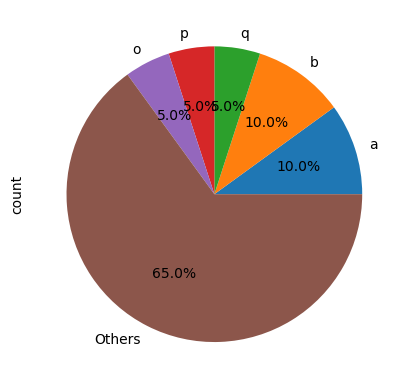

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Col_1': ['a', 'b', 'c', 'b', 'a', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'],
                   'Col_2': [1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

# Group by values in 'Col_1' and count occurrences
grouped = df['Col_1'].value_counts()

# Keep only top 5 values and group the rest as 'Others'
top_values = grouped.head(5)
other_values_count = grouped.iloc[5:].sum()
top_values['Others'] = other_values_count

# Plot pie chart
top_values.plot(kind='pie', autopct='%1.1f%%')
plt.show()